In [1]:
import xmitgcm as xmit

In [5]:
import matplotlib.pyplot as plt

In [6]:
import xarray as xr

In [20]:
import numpy as np

In [14]:
ds = xmit.open_mdsdataset("../../data/SimRockallTrough/")
ds["PTRACER01"]=ds["PTRACER01"].where(ds['hFacC']!=0.)

Mreal = 16. #kg
Mtotal = (ds["PTRACER01"]*(ds['rA']*ds['drF']*ds['hFacC'])).isel(time=0).sum(["XC", "YC", "Z"]).values
ds["PTRACER01"] *= Mreal/Mtotal

/Users/hdrake/opt/anaconda3/envs/bblturb-analysis/lib/python3.9/site-packages/xmitgcm/mds_store.py:913: UserWarning: Couldn't find available_diagnostics.log in ../../data/SimRockallTrough/ or ../../data/SimRockallTrough/. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


In [15]:
ds["PTRACER01_Zint"] = (ds["PTRACER01"]*ds["drF"]*ds["hFacC"]).sum("Z").compute()

In [41]:
ds["time"]/(86400.*2e7)

<xarray.DataArray 'time' (time: 80)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
      dtype='timedelta64[ns]')
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:00 00:28:48 ... 1 days 13:55:12

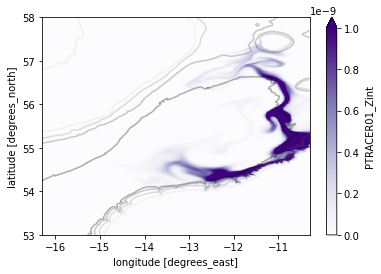

In [56]:
ds["PTRACER01_Zint"].isel(time=70).plot(cmap="Purples", vmin=0, vmax=1e-9)
ds["Depth"].plot.contour(levels=np.arange(500, 3000, 500), cmap="Greys", alpha=0.3)

(54.0, 55.5)

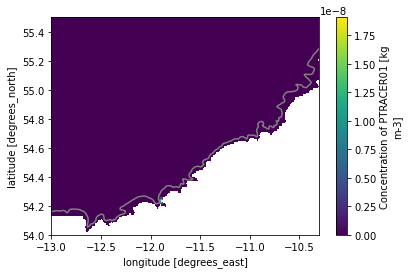

In [9]:
(ds["PTRACER01"].where(ds['hFacC']!=0.)).isel(time=0).sel(Z=-1500, method="nearest").plot()
ds['Depth'].plot.contour(levels=[1800], colors="grey")

plt.xlim(-13, -10.3)
plt.ylim(54, 55.5)

(54.15, 54.35)

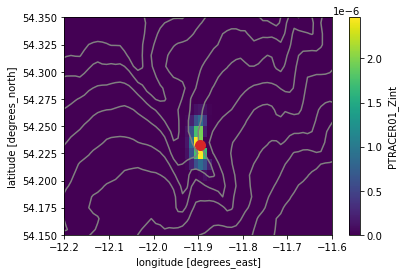

In [80]:
ds["PTRACER01_Zint"].isel(time=0).sel(method="nearest").plot()
ds['Depth'].plot.contour(levels=np.arange(0, 2600, 200), colors="grey")

release = [-11.895, 54.233]
plt.plot(release[0], release[1], "C3o", markersize=10)
plt.xlim(-12.2, -11.6)
plt.ylim(54.15, 54.35)

(54.0, 55.5)

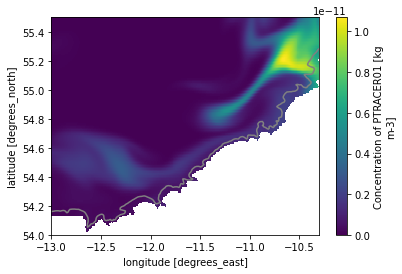

In [8]:
(ds["PTRACER01"].where(ds['hFacC']!=0.)).isel(time=-1).sel(Z=-1500, method="nearest").plot()
ds['Depth'].plot.contour(levels=[1800], colors="grey")

plt.xlim(-13, -10.3)
plt.ylim(54, 55.5)

In [ ]:
plt.figure(figsize=(10, 4))
(ds["PTRACER01"].where(ds['hFacC']!=0.)).isel(time=-1).sel(XC=-11.5, method="nearest").plot()
plt.ylim([-2800, -500])

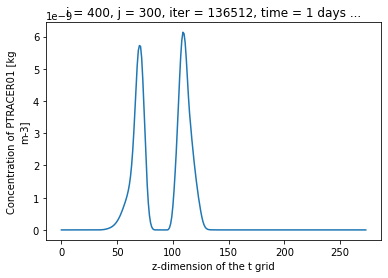

In [54]:
(ds["PTRACER01"].where(hFacC['hFacC']!=0.)).isel(time=-1, j=300, i=400).plot()

In [49]:
XC = xmit.utils.read_mds("../../data/SimRockallTrough/XC")

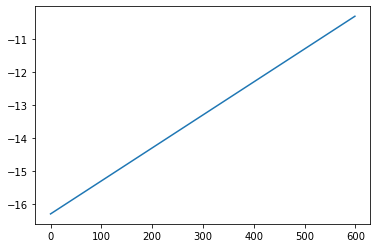

In [60]:
import matplotlib.pyplot as plt
plt.plot(XC["XC"][0, :])

In [34]:
ds.rename({"i":"XC"}).assign_coords({"XC": XC})

MissingDimensionsError: cannot set variable 'XC' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.